<b><font size="+3">CS 2302 Data Structures</font></b>

**Heaps**

**Author:** [Olac Fuentes](http://www.cs.utep.edu/ofuentes/)<br>
**Last modified:** 2021/10/13<br>
Please report errors to me. 

The following code implements a min heap. 

The heap is implemented as a list of objects of type HeapRecord. 

A HeapRecord object containins a key and a data attribute. By default, the data attribute is set to an empty string ('').

The heap order is maintained by observing the key in each HeapRecord, with the HeapRecord with minimum key always located at the root. 

By default, the data attribute is an empty string. For illustation purposes, we only display the keys in the draw() function. 

Recall that the insertion operation consists of the following steps:

1. Append record to the end of the heap.
2. 'Bubble-up' last record - swap recod with parent if the key in the parent is greater than the key in the child. Appy recursively to parent until we reach the root or no swap is performed. 

In the implementation, insert may receive a HeapRecord or an integer. If it receives an integer, it creates a HeapRecord containing that integer as key and an empty string as data. 

In [4]:
# Code to implement basic min heap operations
# Programmed by Olac Fuentes
# Last modified October 13, 2021

import matplotlib.pyplot as plt
import numpy as np

class heap_record:
    def __init__(self,key, data=''):
        self.key = key
        self.data = data

class min_heap:
    def __init__(self):
        self.heap = []

    def insert(self,rec):
        # Add record to heap. If rec is an int, it creates a heap_record containing that int
        if type(rec)!=heap_record:
            rec = heap_record(rec)
        self.heap.append(rec) # Add new item to end of heap
        self.bubble_up(len(self.heap)-1)

    def bubble_up(self,i):
      if i>0 and self.heap[i].key < self.heap[self.parent(i)].key:
          self.heap[i], self.heap[self.parent(i)] = self.heap[self.parent(i)], self.heap[i]
          self.bubble_up(self.parent(i))

    def extract_min(self):
        assert len(self.heap)>0 # Raise error if trying to extractMin from empty heap
        if len(self.heap) == 1:
            return self.heap.pop() # Return and remove root; heap is now empty
        root = self.heap[0]
        self.heap[0] = self.heap.pop() # Move last element from heap to root, reduce heap size
        self.percolate_down(0)
        return root

    def percolate_down(self,i):
        smallest = i
        for k in [self.left (i),self.right (i)]:
            if k < len(self.heap) and self.heap[k].key < self.heap[smallest].key:
                smallest = k
        if smallest != i: # Parent is not smaller than either of its  ren
            self.heap[i],self.heap[smallest] = self.heap[smallest],self.heap[i] # Swap parent with smaller  
            self.percolate_down(smallest)

    def parent(self,i):
        return (i-1)//2

    def left(self,i):
        return 2*i + 1

    def right(self,i):
        return 2*i + 2

    def draw(self,title='',indices=False):
        if len(self.heap)>0:
            fig, ax = plt.subplots()
            self.dh(0, 0, 0, 100, 50, ax,indices)
            ax.axis('off')
            fig.suptitle(title, fontsize=14)

    def dh(self, i, x, y, dx, dy, ax,indices):
        if self.left(i) < len(self.heap):
            p=np.array([[x,y], [x-dx,y-dy]])
            ax.plot(p[:,0],p[:,1],linewidth=1,color='k')
            self.dh(self.left (i), x-dx, y-dy, dx/2, dy, ax, indices)
        if self.right(i) < len(self.heap):
            p=np.array([[x,y], [x+dx,y-dy]])
            ax.plot(p[:,0],p[:,1],linewidth=1,color='k')
            self.dh(self.right(i), x+dx, y-dy, dx/2, dy, ax, indices)
        ax.text(x,y, str(self.heap[i].key), size=20,
            ha="center", va="center",
            bbox=dict(facecolor='w',boxstyle="circle"))
        if indices:
            ax.text(x-4,y-24, str(i), size=12,color='r')

The following cell shows the construction of a heap by inserting a sequence of random integer. The integers in red represent the position of the record in the H.heap list. 

Notice that if *i* is the index of a node,

if i>0:

*parent(i) = (i-1)//2*

if i==0:

i is the root, thus it has no parent.

if 2*i + 1 < length of heap:

leftChild(i) = 2*i + 1  

if 2*i + 1 >= length of heap:

i has no leftChild

if 2*i + 2 < length of heap:

rightChild(i) = 2*i + 2 *

if 2*i + 2 >= length of heap:

i has no rightChild




In [ ]:
H = min_heap()
A = np.random.randint(0,20,(12))
for a in A:
    H.insert(a)
    print('Inserted',a,'heap size:',len(H.heap))
    #H.draw() # Uncomment to see intermediate results. 

H.draw(indices=True)

Recall the for extract_min we perform the following operations:

1. Copy the record at the root to a temporary variable.
2. Copy the last record in the heap to the root.
3. Delete the last record in the heap.
4. Percolate down the root: If the key at the root is larger than the smallerst key in the roots children, swap root with that children. Apply recursively to the node that was swapped with the root until no changes are made.
5. Return the temporary variable containing the original root.

Let's see the results of extracting the data from the heap above.

In [ ]:
H.draw()
while len(H.heap)>0:
    m = H.extract_min()
    print('Extracted',m.key,'heap size:',len(H.heap))
    H.draw('Heap after extracting '+str(m.key))

Notice that the heap is a list of heap records, which contain a key and aditional data. The draw() operation only shows the key of every record, and by default the data part is an empty string. 

In the examples above, since we passed an integer to the insert function, all records contain the given integer key and the default value ('') in the data attribute.

Now let's show an example using records with non-empty data attributes. 


Suppose the following people have made requests to use a shared resource (for example, a printer) and have the stated priotities (lower is more important).

*   Mark, 4
*   James, 3
*   Linda, 1
*   George, 11
*   Thomas, 6
*   Mary, 7

In what order should their requests be granted?

We can use a heap to store the requests, where the priority is the key and the name is the data.

We can then extract the requests from the heap, always retrieving the request with highest priority (lowest key).

In [ ]:
requests = [['Mark', 4],['James', 3], ['Linda', 1], ['George', 11], ['Thomas', 6], ['Mary', 7]]

H = min_heap()
for r in requests:
  H.insert(heap_record(r[1],r[0]))

H.draw('Heap showing keys')

print('Sequence of turns:')
while len(H.heap)>0:
  r = H.extract_min()
  print('Turn:',r.data,'Priority:',r.key)

**Example 1:** 
Write the function *is_heap(L)* that receives a list of integers L and determines if it’s in heap order.


For this function, we will not need ot use the min_heap class. 

In [5]:
def is_heap(L):
    for i in range(1,len(L)):
        if L[i]<L[(i-1)//2]:
            return False
    return True

In [ ]:
is_heap(np.arange(10))

In [ ]:
is_heap([2,4,5,5,9,6,7,8])

In [ ]:
is_heap([2,4,5,5,9,6,7,8,7])

In [ ]:
is_heap([2,4,5,5,9,6,7,8,7,7])

**Example 2:** Write the function second(H) that receives a heap H and returns the second smallest key stored in H. If H has less than 2 elements, your function should return None. 

In [ ]:
def second(H):
    if len(H.heap)<2:
        return None
    if len(H.heap)==2:
        return H.heap[1].key
    return min(H.heap[1].key,H.heap[2].key)

In [ ]:
H = min_heap()
A = np.random.randint(0,20,10)
for a in A:
    H.insert(a)
H.draw()

print('Second smallest item:',second(H))

**Example 3:** Write the function path(H,k) that receives a heap H and an integer k and returns a list containing the elements on the path from H.heap[k] to the root of the heap (H.heap[0]).

In [73]:
def path(H,k):
    p=[H.heap[k].key]
    while k>0:
        k=H.parent(k)
        p.append(H.heap[k].key)
    return p

the path from element at position 0 to root is [1]
the path from element at position 1 to root is [5, 1]
the path from element at position 2 to root is [2, 1]
the path from element at position 3 to root is [11, 5, 1]
the path from element at position 4 to root is [13, 5, 1]
the path from element at position 5 to root is [10, 2, 1]
the path from element at position 6 to root is [6, 2, 1]
the path from element at position 7 to root is [17, 11, 5, 1]
the path from element at position 8 to root is [14, 11, 5, 1]
the path from element at position 9 to root is [14, 13, 5, 1]
the path from element at position 10 to root is [18, 13, 5, 1]
the path from element at position 11 to root is [17, 10, 2, 1]
the path from element at position 12 to root is [10, 10, 2, 1]
the path from element at position 13 to root is [14, 6, 2, 1]
the path from element at position 14 to root is [9, 6, 2, 1]


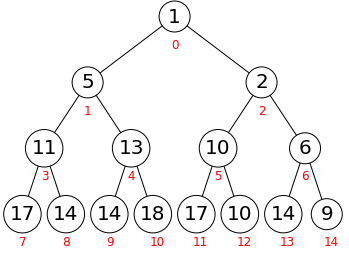

In [74]:
H = min_heap()
A = np.random.randint(0,20,15)
for a in A:
    H.insert(a)

H.draw(indices=True)

for i in range(len(H.heap)):
  print('the path from element at position',i,'to root is',path(H,i))

# **Exercises**

**Exercise 1**: Write the function root(H) that receives a heap H and returns the key stored in the root of H. You may assume that the heap is not empty. 

In [4]:
def root(H):
    return H.heap[0].key
  

the key at the root is  0


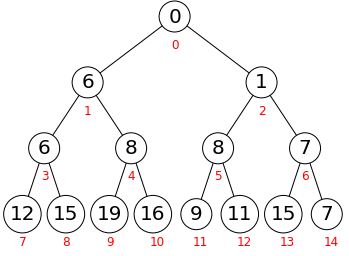

In [5]:
H = min_heap()
A = np.random.randint(0,20,15)
for a in A:
    H.insert(a)

H.draw(indices=True)

print('the key at the root is ',root(H))

**Exercise 2**: Write the function last(H) that receives a heap H and returns the key stored in the last node of H (the rightmost node at the last level). You may assume that the heap is not empty.

In [21]:
def last(H):
  return H.heap[-1].key
  

the last key is  17


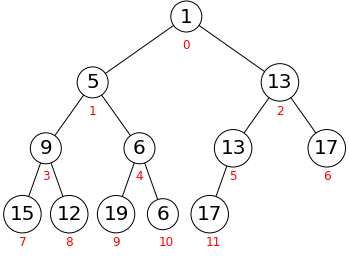

In [23]:
H = min_heap()
A = np.random.randint(0,20,np.random.randint(6,15))
for a in A:
    H.insert(a)

H.draw(indices=True)

print('the last key is ',last(H))

**Exercise 3**: Write the function size(H) that receives a heap H and returns the number of elements stored in H. 

In [11]:
def size(H):
    return len(H.heap)
  

the size of the heap is  13


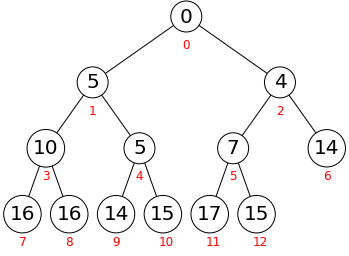

In [12]:
H = min_heap()
A = np.random.randint(0,20,np.random.randint(6,15))
for a in A:
    H.insert(a)
    
H.draw(indices=True)

print('the size of the heap is ',size(H))

**Exercise 4:** Write the function height(H) that receives a heap H and returns the height of the tree stored in H. Hint: this can be done in O(log n) time using a loop. For extra credit, write the function height1(H); that solves the problem in O(1).

In [31]:
def height(H):
    k=H.heap[-1].key
    count = 0
    while k>0:
        k=H.parent(k)
        count+=1
    return count
    # O(log n) solution
    

    

In [71]:
def height_1(H):
    # O(1) solution
    count = 0
    if count == 0:
        k=H.heap[-1].key
    if k>0:
        return count
    count +=1
    count+height_1(k=H.parent(k))
    count = height_1(k=H.parent(k))
    return count
    
    
    

13
height= 3
height= 0


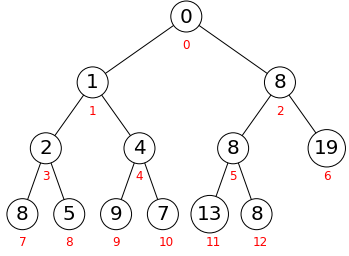

In [72]:
H = min_heap()
A = np.random.randint(0,20,np.random.randint(1,16))
print(len(A))
for a in A:
    H.insert(a)
H.draw(indices=True)
print('height=',height(H))
print('height=',height_1(H))


**Exercise 5:**	Write the function *sibling(H,k)* that receives a heap *H* and a positive integer *k* and returns the position of the sibling of the item at position *k* in *H*. If the heap has no item at position *k*, or if *k* does not have a sibling, your function should return *None*.  

In [69]:
def sibling(H,k):
    temp = k
    p=[H.heap[k].key]
    k=H.parent(k)
    if k == 0:
        return H.heap[0].key
    if H.right(k)==temp:
        k=H.left(k)
        p.append(H.heap[k].key)
        return p
    elif H.left(k)==temp:
        k=H.right(k)
        p.append(H.heap[k].key)
        return p
    return None
    

sibling of item in position 0 is in position [2, 15]
sibling of item in position 1 is in position 2
sibling of item in position 2 is in position 2
sibling of item in position 3 is in position [14, 14]
sibling of item in position 4 is in position [14, 14]
sibling of item in position 5 is in position [8, 19]
sibling of item in position 6 is in position [19, 8]
sibling of item in position 7 is in position [16, 14]
sibling of item in position 8 is in position [14, 16]
sibling of item in position 9 is in position [17, 15]
sibling of item in position 10 is in position [15, 17]


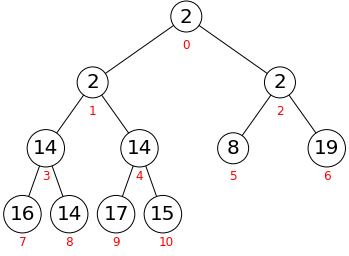

In [70]:
H = min_heap()
A = np.random.randint(0,20,np.random.randint(1,12))
for a in A:
    H.insert(a)
H.draw(indices=True)

for a in range(len(A)):
  print('sibling of item in position {} is in position {}'.format(a,sibling(H,a)))
  

**Exercise 6:**	Write the function *equal_siblings(H)* that receives a heap *H* and determines if *H* contains two siblings that are equal. 

In [67]:
def equal_siblings(H):
    for i in H.heap:
        if i in H.heap:
            return True
    return False
    

The heap has equal siblings


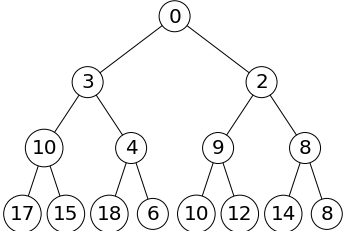

In [68]:
H = min_heap()
A = np.random.randint(0,20,15)
for a in A:
    H.insert(a)
H.draw()

if equal_siblings(H):
    print('The heap has equal siblings')
else:
    print('The heap does not have equal siblings')
